In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# prompt: /content/2021Citibike daily trip counts&weather.csv,/content/2022Citibike daily trip counts&weather.csv,/content/2023Citibike daily trip counts&weather.csv,/content/2024Citibike daily trip counts&weather.csv ,/content/Final_Urban_Feaatures_Merged_csv.csv
# print the head of all these datasets

import pandas as pd

file_paths = [
    "/content/2021Citibike daily trip counts&weather.csv",
    "/content/2022Citibike daily trip counts&weather.csv",
    "/content/2023Citibike daily trip counts&weather.csv",
    "/content/2024Citibike daily trip counts&weather.csv",
    "/content/Final_Urban_Feaatures_Merged_csv.csv"
]

for file_path in file_paths:
  try:
    df = pd.read_csv(file_path)
    print(f"Head of {file_path}:")
    print(df.head())
    print("-" * 20)
  except FileNotFoundError:
    print(f"Error: File not found - {file_path}")
  except pd.errors.ParserError:
    print(f"Error: Could not parse the file - {file_path}")
  except Exception as e:
    print(f"An unexpected error occurred while processing {file_path}: {e}")


Head of /content/2021Citibike daily trip counts&weather.csv:
   start_station_id        DATE  booking_count  TAVG
0           4818.03  2021-01-01            4.0  36.5
1           4818.03  2021-01-02           16.0  43.5
2           4818.03  2021-01-03            5.0  36.0
3           4818.03  2021-01-04            8.0  39.0
4           4818.03  2021-01-05            8.0  39.0
--------------------
Head of /content/2022Citibike daily trip counts&weather.csv:
  start_station_id        DATE  booking_count  TAVG
0          4818.03  2022-01-01              8  53.0
1          4818.03  2022-01-02             19  48.0
2          4818.03  2022-01-03             11  29.5
3          4818.03  2022-01-04             10  26.5
4          4818.03  2022-01-05              9  39.0
--------------------


<ipython-input-127-9e609f907985>:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-127-9e609f907985>:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Head of /content/2023Citibike daily trip counts&weather.csv:
  start_station_id        DATE  booking_count  TAVG
0          4818.03  2023-01-01             19  52.0
1          4818.03  2023-01-02             22  52.5
2          4818.03  2023-01-03             18  52.5
3          4818.03  2023-01-04             32  57.5
4          4818.03  2023-01-05             33  47.0
--------------------
Head of /content/2024Citibike daily trip counts&weather.csv:
  start_station_id        DATE  booking_count  TAVG
0          4818.03  2024-01-01             13  41.0
1          4818.03  2024-01-02             22  35.5
2          4818.03  2024-01-03             28  38.5
3          4818.03  2024-01-04             21  36.5
4          4818.03  2024-01-05             25  31.5
--------------------
Head of /content/Final_Urban_Feaatures_Merged_csv.csv:
  station_id  metro_500m  bus_500m  Parks_500m  Libraries_500m  Colleges_500m  \
0    4818.03           8        13           0               0              

<ipython-input-127-9e609f907985>:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
# Load the data
df_2021 = pd.read_csv('/content/2021Citibike daily trip counts&weather.csv')
df_2022 = pd.read_csv('/content/2022Citibike daily trip counts&weather.csv')
df_2023 = pd.read_csv('/content/2023Citibike daily trip counts&weather.csv')
df_2024 = pd.read_csv('/content/2024Citibike daily trip counts&weather.csv')
df_urban = pd.read_csv('/content/Final_Urban_Feaatures_Merged_csv.csv')


<ipython-input-128-9de985b7192f>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022 = pd.read_csv('/content/2022Citibike daily trip counts&weather.csv')
<ipython-input-128-9de985b7192f>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023 = pd.read_csv('/content/2023Citibike daily trip counts&weather.csv')
<ipython-input-128-9de985b7192f>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv('/content/2024Citibike daily trip counts&weather.csv')


In [ ]:
# Combine data into one DataFrame
df = pd.concat([df_2021[['start_station_id', 'DATE', 'booking_count', 'TAVG']],
                df_2022[['start_station_id', 'DATE', 'booking_count', 'TAVG']],
                df_2023[['start_station_id', 'DATE', 'booking_count', 'TAVG']],
                df_2024[['start_station_id', 'DATE', 'booking_count', 'TAVG']]])


In [ ]:
# Filter for station 4818.03 only
df = df[df['start_station_id'] == 4818.03]


In [ ]:
# Convert 'DATE' and 'time_bucket' to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


In [ ]:
# Merge station features for station 4818.03
df = pd.merge(df, df_urban, left_on='start_station_id', right_on='station_id', how='left')


In [ ]:
# Handle missing values
df = df.dropna(subset=['booking_count', 'DATE'])


In [ ]:
# Select relevant columns
df = df[['start_station_id', 'DATE', 'booking_count', 'TAVG']]


In [ ]:
# Rename columns for Prophet compatibility
df.rename(columns={'DATE': 'ds', 'booking_count': 'y', 'TAVG': 'temperature'}, inplace=True)


In [ ]:
# Sort data by 'ds'
df = df.sort_values('ds')


In [ ]:
# Split data into 70% train, 15% validation, 15% test
train, temp = train_test_split(df, test_size=0.3, shuffle=False)
validation, test = train_test_split(temp, test_size=0.5, shuffle=False)


In [ ]:
# Initialize Prophet model
model = Prophet()


In [ ]:

# Add temperature as regressor
model.add_regressor('temperature')


In [ ]:
# Fit the model on the training set
model.fit(train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpboo2961t/hbrvnoed.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpboo2961t/dmruy6s0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99688', 'data', 'file=/tmp/tmpboo2961t/hbrvnoed.json', 'init=/tmp/tmpboo2961t/dmruy6s0.json', 'output', 'file=/tmp/tmpboo2961t/prophet_modelqcj349u1/prophet_model-20250501214711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:47:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:47:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Ensure the 'ds' column has datetime format
validation['ds'] = pd.to_datetime(validation['ds'])

# Explicitly set the frequency of the 'ds' column if it's missing
validation = validation.set_index('ds')
validation = validation.asfreq('D')  # Assuming daily data; change 'D' if needed

# Create future dataframe using the validation dataset's 'ds' column (no need for 'periods=0')
future_validation = model.make_future_dataframe(validation.reset_index(), periods=0)

# Reset index of validation DataFrame (if needed)
validation = validation.reset_index(drop=True)

# Ensure that future_validation and validation have the same number of rows
future_validation = future_validation.iloc[:len(validation)]

# Add temperature regressor values to future_validation
future_validation['temperature'] = validation['temperature'].values

# Make predictions on the validation set
forecast_validation = model.predict(future_validation)

# Plot the validation forecast
fig = model.plot(forecast_validation)
plt.title("Validation Forecast (Including 2023)")
plt.show()


TypeError: Prophet.make_future_dataframe() got multiple values for argument 'periods'

In [ ]:
# Evaluate on validation set (calculating MSE, MAE, MAPE, RMSE)
validation['predicted'] = forecast_validation['yhat']


In [ ]:
# Calculate MSE, MAE, RMSE, and MAPE
mse_validation = ((validation['y'] - validation['predicted'])**2).mean()
mae_validation = (validation['y'] - validation['predicted']).abs().mean()
rmse_validation = np.sqrt(mse_validation)
mape_validation = (abs(validation['y'] - validation['predicted']) / validation['y']).mean() * 100

print(f"Validation Set Evaluation Metrics:")
print(f"MSE: {mse_validation}")
print(f"MAE: {mae_validation}")
print(f"RMSE: {rmse_validation}")
print(f"MAPE: {mape_validation}%")


Validation Set Evaluation Metrics:
MSE: 297.6309063340986
MAE: 15.568512331865605
RMSE: 17.251982678350295
MAPE: 60.60646485303594%


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpboo2961t/ftfihf0z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpboo2961t/t4lfylzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62896', 'data', 'file=/tmp/tmpboo2961t/ftfihf0z.json', 'init=/tmp/tmpboo2961t/t4lfylzo.json', 'output', 'file=/tmp/tmpboo2961t/prophet_model7e_m2e1a/prophet_model-20250501222904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:29:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:29:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


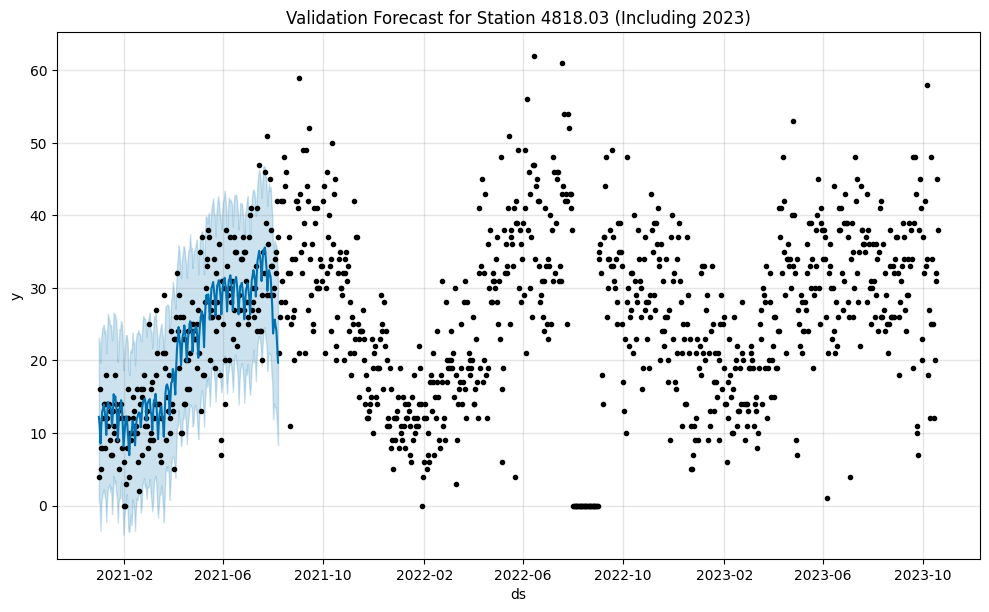

Validation Set Evaluation Metrics:
MSE: 117.69713270659832
MAE: 8.500855495964858
RMSE: 10.848830937322155
MAPE: 51.13377755568326%


<ipython-input-142-73110f780c94>:81: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future_test['temperature'].fillna(train['temperature'].mean(), inplace=True)  # Fill with mean


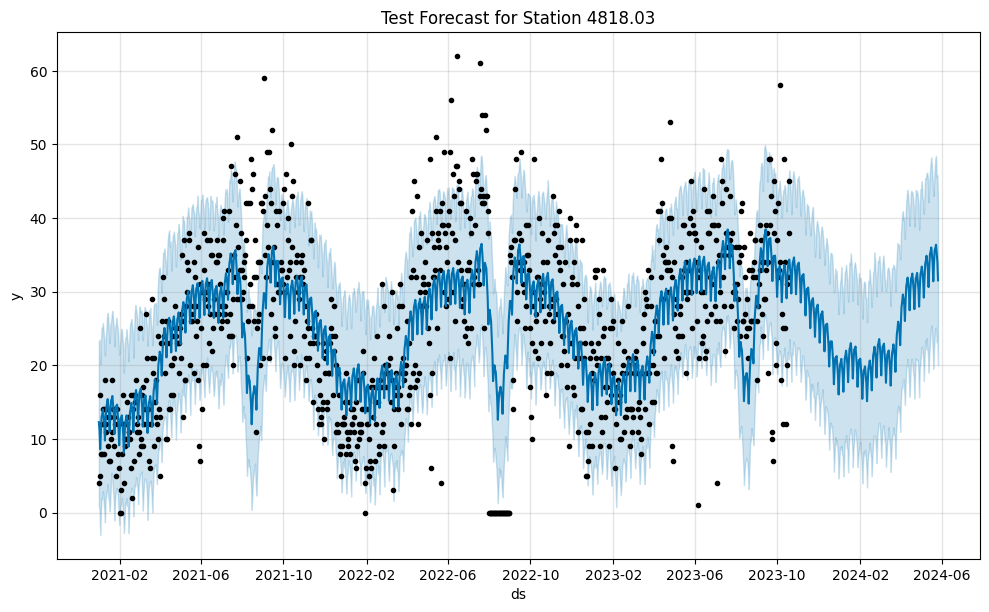


Test Set Evaluation Metrics:
MSE: 226.12830286456435
MAE: 12.530364323525266
RMSE: 15.037563062696174
MAPE: 60.96682216921655%


In [ ]:
# Filter the data for station 4818.03 only
df_station = df[df['start_station_id'] == 4818.03]  # Original line

# Check if df_station is empty after filtering
if df_station.empty:
    print("Error: No data found for station 4818.03. Please check your data or station ID.")
# Convert 'DATE' and 'time_bucket' to datetime format
df_station['DATE'] = pd.to_datetime(df_station['DATE'], errors='coerce')
df_station['DATE'] = pd.to_datetime(df_station['DATE'], errors='coerce')

# Use the 'TAVG' as the temperature column directly
df_station = df_station.dropna(subset=['booking_count', 'DATE'])

# Rename columns to match Prophet's expected format
df_station.rename(columns={'DATE': 'ds', 'booking_count': 'y', 'TAVG': 'temperature'}, inplace=True)

# Sort the data by 'ds' (date)
df_station = df_station.sort_values('ds')

# Split data into training (70%), validation (15%), and test (15%)
train_size = int(0.7 * len(df_station))
val_size = int(0.15 * len(df_station))

train = df_station[:train_size]
validation = df_station[train_size:train_size + val_size]
test = df_station[train_size + val_size:]

# Ensure that 'train', 'validation', and 'test' have the expected columns: 'ds', 'y', and 'temperature'
train = train[['ds', 'y', 'temperature']].reset_index(drop=True) # Select 'ds', 'y', and 'temperature' and reset index
validation = validation[['ds', 'y', 'temperature']].reset_index(drop=True) # Select 'ds', 'y', and 'temperature' and reset index
test = test[['ds', 'y', 'temperature']].reset_index(drop=True) # Select 'ds', 'y', and 'temperature' and reset index

# Initialize Prophet model
model = Prophet()

# Add temperature as regressor (already present in 'temperature' column)
model.add_regressor('temperature')

# Fit the model on the training data
model.fit(train)

# Make predictions on the validation set
# Instead of using validation[['ds']], directly pass the 'ds' column as a Series
future_validation = model.make_future_dataframe(periods=len(validation), freq='D')

# Add the temperature regressor to the validation set
# Instead of assigning directly, use 'pd.concat' to align the DataFrames:
future_validation = pd.concat([future_validation, validation['temperature']], axis=1)
future_validation = future_validation.dropna()  # This might be necessary due to misalignment during concat

# Generate the forecast for the validation set
forecast_validation = model.predict(future_validation)
# Plot the validation forecast
fig = model.plot(forecast_validation)
plt.title("Validation Forecast for Station 4818.03 (Including 2023)")
plt.show()

# Evaluate the model on the validation set
validation['predicted'] = forecast_validation['yhat']

# Calculate evaluation metrics: MSE, MAE, RMSE, MAPE
mse_validation = ((validation['y'] - validation['predicted'])**2).mean()
mae_validation = (validation['y'] - validation['predicted']).abs().mean()
rmse_validation = np.sqrt(mse_validation)
mape_validation = (abs(validation['y'] - validation['predicted']) / validation['y']).mean() * 100

print(f"Validation Set Evaluation Metrics:")
print(f"MSE: {mse_validation}")
print(f"MAE: {mae_validation}")
print(f"RMSE: {rmse_validation}")
print(f"MAPE: {mape_validation}%")

# Make predictions on the test set
future_test = model.make_future_dataframe(periods=len(test), freq='D')

# Instead of directly assigning, merge to align data properly
future_test = pd.merge(future_test, test[['ds', 'temperature']], on='ds', how='left')

# Fill NaN values in 'temperature' with the mean temperature from the training set
# (or another appropriate method for handling missing values)
future_test['temperature'].fillna(train['temperature'].mean(), inplace=True)  # Fill with mean

# Generate the forecast for the test set
forecast_test = model.predict(future_test)
# Plot the test forecast
fig = model.plot(forecast_test)
plt.title("Test Forecast for Station 4818.03")
plt.show()

# Evaluate the model on the test set
test['predicted'] = forecast_test['yhat']

# Calculate evaluation metrics for the test set
mse_test = ((test['y'] - test['predicted'])**2).mean()
mae_test = (test['y'] - test['predicted']).abs().mean()
rmse_test = np.sqrt(mse_test)
mape_test = (abs(test['y'] - test['predicted']) / test['y']).mean() * 100

print(f"\nTest Set Evaluation Metrics:")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}%")


DEBUG:cmdstanpy:input tempfile: /tmp/tmpboo2961t/apdzcgmn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpboo2961t/f1k8t5b5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94117', 'data', 'file=/tmp/tmpboo2961t/apdzcgmn.json', 'init=/tmp/tmpboo2961t/f1k8t5b5.json', 'output', 'file=/tmp/tmpboo2961t/prophet_modelxblyz_2n/prophet_model-20250501223400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:34:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:34:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


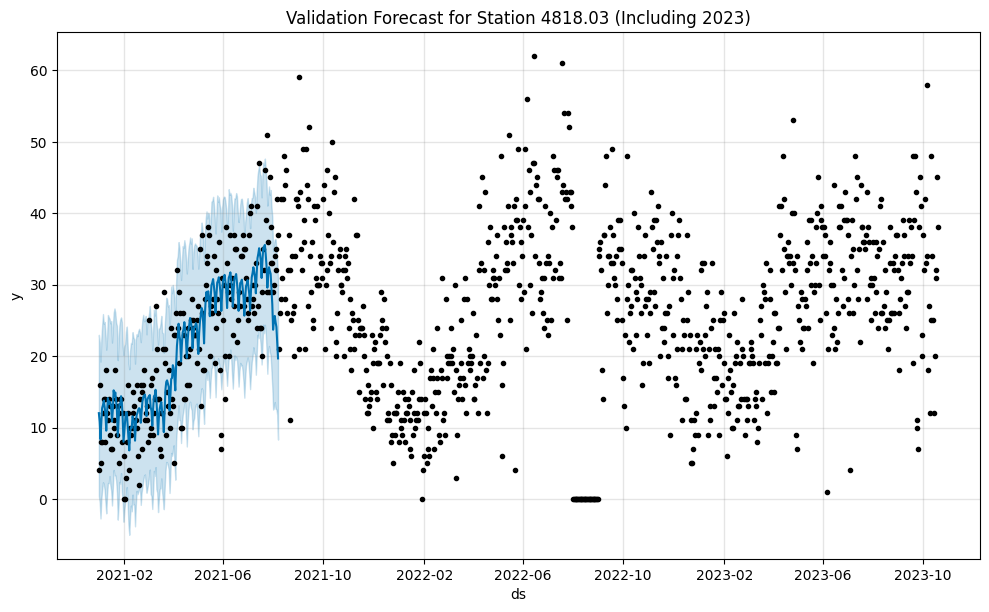

Validation Set Evaluation Metrics:
MSE: 118.34967109787347
MAE: 8.519434161778099
RMSE: 10.878863502125277
MAPE: 51.12512182944725%


<ipython-input-146-5f94ecc61e73>:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future_test['temperature'].fillna(train['temperature'].mean(), inplace=True)  # Fill with mean


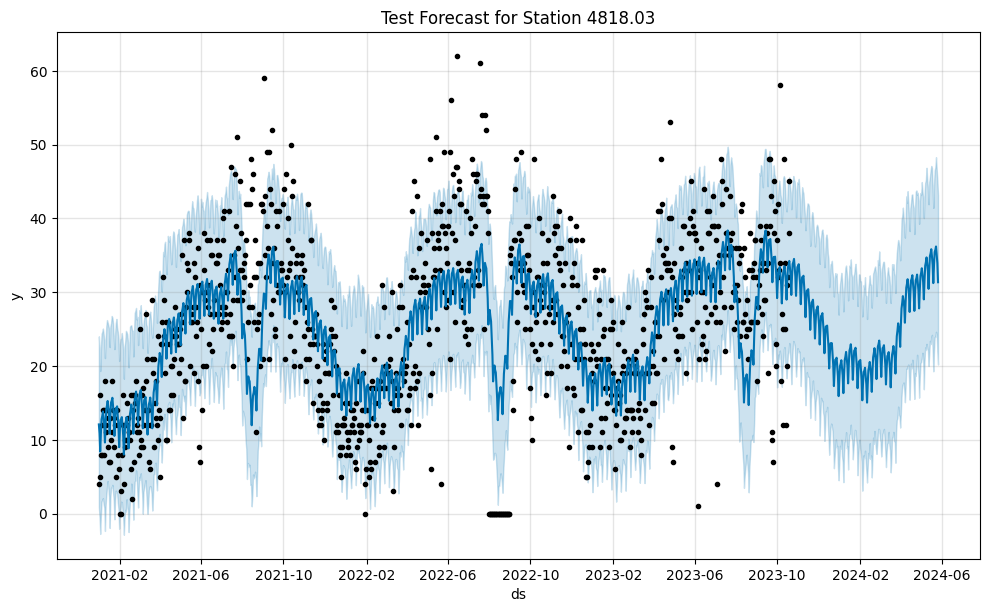


Test Set Evaluation Metrics:
MSE: 227.8147732634809
MAE: 12.581022597167571
RMSE: 15.093534154182741
MAPE: 61.10409602394292%


In [ ]:
# Filter the data for station 4818.03 only
df_station = df[df['start_station_id'] == 4818.03]  # Original line

# Check if df_station is empty after filtering
if df_station.empty:
    print("Error: No data found for station 4818.03. Please check your data or station ID.")
# Convert 'DATE' and 'time_bucket' to datetime format
df_station['DATE'] = pd.to_datetime(df_station['DATE'], errors='coerce')
df_station['DATE'] = pd.to_datetime(df_station['DATE'], errors='coerce')

# Use the 'TAVG' as the temperature column directly
df_station = df_station.dropna(subset=['booking_count', 'DATE'])

# Rename columns to match Prophet's expected format
df_station.rename(columns={'DATE': 'ds', 'booking_count': 'y', 'TAVG': 'temperature'}, inplace=True)

# Sort the data by 'ds' (date)
df_station = df_station.sort_values('ds')

# Split data into training (70%), validation (15%), and test (15%)
train_size = int(0.7 * len(df_station))
val_size = int(0.15 * len(df_station))

train = df_station[:train_size]
validation = df_station[train_size:train_size + val_size]
test = df_station[train_size + val_size:]

# Ensure that 'train', 'validation', and 'test' have the expected columns: 'ds', 'y', and 'temperature'
train = train[['ds', 'y', 'temperature']].reset_index(drop=True) # Select 'ds', 'y', and 'temperature' and reset index
validation = validation[['ds', 'y', 'temperature']].reset_index(drop=True) # Select 'ds', 'y', and 'temperature' and reset index
test = test[['ds', 'y', 'temperature']].reset_index(drop=True) # Select 'ds', 'y', and 'temperature' and reset index

# Initialize Prophet model
model = Prophet(daily_seasonality=True)


# Add temperature as regressor (already present in 'temperature' column)
model.add_regressor('temperature')

# Fit the model on the training data
model.fit(train)

# Make predictions on the validation set
# Instead of using validation[['ds']], directly pass the 'ds' column as a Series
future_validation = model.make_future_dataframe(periods=len(validation), freq='D')

# Add the temperature regressor to the validation set
# Instead of assigning directly, use 'pd.concat' to align the DataFrames:
future_validation = pd.concat([future_validation, validation['temperature']], axis=1)
future_validation = future_validation.dropna()  # This might be necessary due to misalignment during concat

# Generate the forecast for the validation set
forecast_validation = model.predict(future_validation)
# Plot the validation forecast
fig = model.plot(forecast_validation)
plt.title("Validation Forecast for Station 4818.03 (Including 2023)")
plt.show()

# Evaluate the model on the validation set
validation['predicted'] = forecast_validation['yhat']

# Calculate evaluation metrics: MSE, MAE, RMSE, MAPE
mse_validation = ((validation['y'] - validation['predicted'])**2).mean()
mae_validation = (validation['y'] - validation['predicted']).abs().mean()
rmse_validation = np.sqrt(mse_validation)
mape_validation = (abs(validation['y'] - validation['predicted']) / validation['y']).mean() * 100

print(f"Validation Set Evaluation Metrics:")
print(f"MSE: {mse_validation}")
print(f"MAE: {mae_validation}")
print(f"RMSE: {rmse_validation}")
print(f"MAPE: {mape_validation}%")

# Make predictions on the test set
future_test = model.make_future_dataframe(periods=len(test), freq='D')

# Instead of directly assigning, merge to align data properly
future_test = pd.merge(future_test, test[['ds', 'temperature']], on='ds', how='left')

# Fill NaN values in 'temperature' with the mean temperature from the training set
# (or another appropriate method for handling missing values)
future_test['temperature'].fillna(train['temperature'].mean(), inplace=True)  # Fill with mean

# Generate the forecast for the test set
forecast_test = model.predict(future_test)
# Plot the test forecast
fig = model.plot(forecast_test)
plt.title("Test Forecast for Station 4818.03")
plt.show()

# Evaluate the model on the test set
test['predicted'] = forecast_test['yhat']

# Calculate evaluation metrics for the test set
mse_test = ((test['y'] - test['predicted'])**2).mean()
mae_test = (test['y'] - test['predicted']).abs().mean()
rmse_test = np.sqrt(mse_test)
mape_test = (abs(test['y'] - test['predicted']) / test['y']).mean() * 100

print(f"\nTest Set Evaluation Metrics:")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}%")


# Code Edit to Enable Daily Seasonality:

DEBUG:cmdstanpy:input tempfile: /tmp/tmpboo2961t/pcxu9bs6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpboo2961t/jmtwmspd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40470', 'data', 'file=/tmp/tmpboo2961t/pcxu9bs6.json', 'init=/tmp/tmpboo2961t/jmtwmspd.json', 'output', 'file=/tmp/tmpboo2961t/prophet_modelcd_k9bu8/prophet_model-20250501223620.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:36:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:36:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


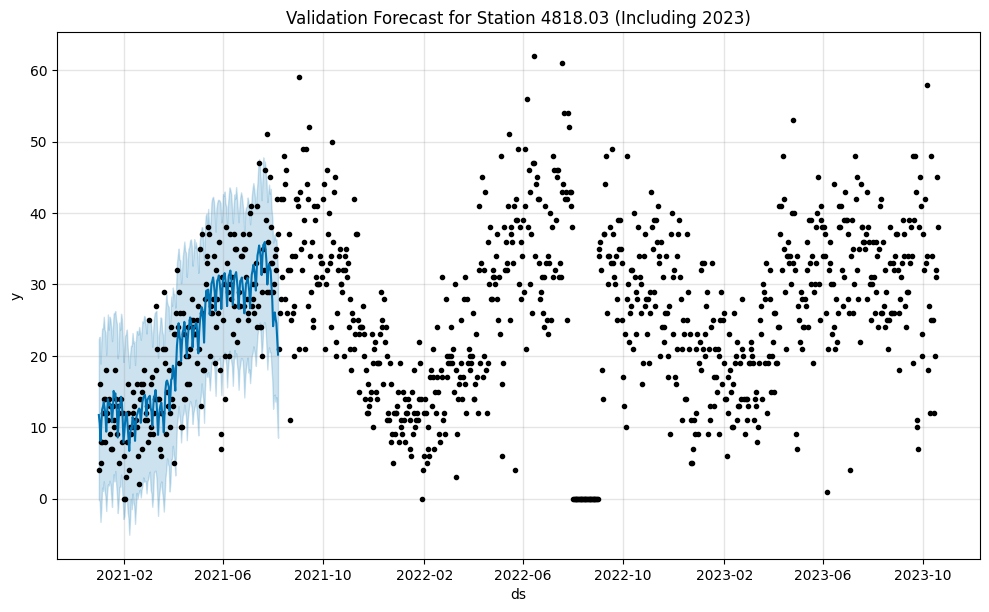

Validation Set Evaluation Metrics:
MSE: 121.06698506545087
MAE: 8.64425783936182
RMSE: 11.003044354425318
MAPE: 51.78549864796885%


<ipython-input-147-bf243e5c4cff>:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future_test['temperature'].fillna(train['temperature'].mean(), inplace=True)  # Fill with mean


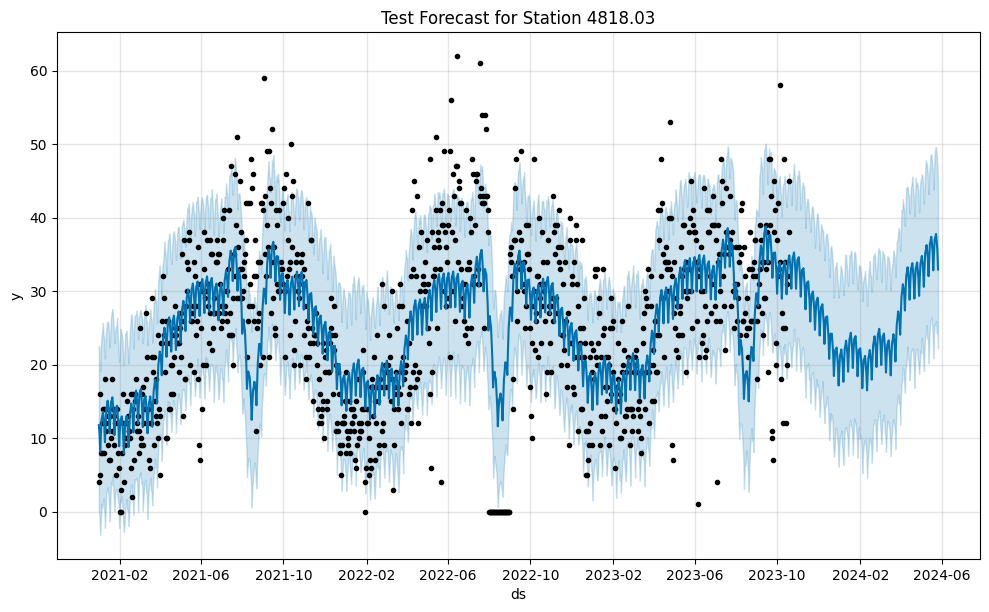


Test Set Evaluation Metrics:
MSE: 231.52065485567059
MAE: 12.682228358168992
RMSE: 15.215802800236029
MAPE: 61.866387742354014%


In [ ]:
# Filter the data for station 4818.03 only
df_station = df[df['start_station_id'] == 4818.03]  # Original line

# Check if df_station is empty after filtering
if df_station.empty:
    print("Error: No data found for station 4818.03. Please check your data or station ID.")
# Convert 'DATE' and 'time_bucket' to datetime format
df_station['DATE'] = pd.to_datetime(df_station['DATE'], errors='coerce')
df_station['DATE'] = pd.to_datetime(df_station['DATE'], errors='coerce')

# Use the 'TAVG' as the temperature column directly
df_station = df_station.dropna(subset=['booking_count', 'DATE'])

# Rename columns to match Prophet's expected format
df_station.rename(columns={'DATE': 'ds', 'booking_count': 'y', 'TAVG': 'temperature'}, inplace=True)

# Sort the data by 'ds' (date)
df_station = df_station.sort_values('ds')

# Split data into training (70%), validation (15%), and test (15%)
train_size = int(0.7 * len(df_station))
val_size = int(0.15 * len(df_station))

train = df_station[:train_size]
validation = df_station[train_size:train_size + val_size]
test = df_station[train_size + val_size:]

# Ensure that 'train', 'validation', and 'test' have the expected columns: 'ds', 'y', and 'temperature'
train = train[['ds', 'y', 'temperature']].reset_index(drop=True) # Select 'ds', 'y', and 'temperature' and reset index
validation = validation[['ds', 'y', 'temperature']].reset_index(drop=True) # Select 'ds', 'y', and 'temperature' and reset index
test = test[['ds', 'y', 'temperature']].reset_index(drop=True) # Select 'ds', 'y', and 'temperature' and reset index

# Initialize Prophet model
model = Prophet(
    daily_seasonality=True,
    changepoint_prior_scale=0.1,  # Adjust this parameter
    seasonality_prior_scale=10.0  # Adjust this parameter
)

# Add temperature as regressor (already present in 'temperature' column)
model.add_regressor('temperature')

# Fit the model on the training data
model.fit(train)

# Make predictions on the validation set
# Instead of using validation[['ds']], directly pass the 'ds' column as a Series
future_validation = model.make_future_dataframe(periods=len(validation), freq='D')

# Add the temperature regressor to the validation set
# Instead of assigning directly, use 'pd.concat' to align the DataFrames:
future_validation = pd.concat([future_validation, validation['temperature']], axis=1)
future_validation = future_validation.dropna()  # This might be necessary due to misalignment during concat

# Generate the forecast for the validation set
forecast_validation = model.predict(future_validation)
# Plot the validation forecast
fig = model.plot(forecast_validation)
plt.title("Validation Forecast for Station 4818.03 (Including 2023)")
plt.show()

# Evaluate the model on the validation set
validation['predicted'] = forecast_validation['yhat']

# Calculate evaluation metrics: MSE, MAE, RMSE, MAPE
mse_validation = ((validation['y'] - validation['predicted'])**2).mean()
mae_validation = (validation['y'] - validation['predicted']).abs().mean()
rmse_validation = np.sqrt(mse_validation)
mape_validation = (abs(validation['y'] - validation['predicted']) / validation['y']).mean() * 100

print(f"Validation Set Evaluation Metrics:")
print(f"MSE: {mse_validation}")
print(f"MAE: {mae_validation}")
print(f"RMSE: {rmse_validation}")
print(f"MAPE: {mape_validation}%")

# Make predictions on the test set
future_test = model.make_future_dataframe(periods=len(test), freq='D')

# Instead of directly assigning, merge to align data properly
future_test = pd.merge(future_test, test[['ds', 'temperature']], on='ds', how='left')

# Fill NaN values in 'temperature' with the mean temperature from the training set
# (or another appropriate method for handling missing values)
future_test['temperature'].fillna(train['temperature'].mean(), inplace=True)  # Fill with mean

# Generate the forecast for the test set
forecast_test = model.predict(future_test)
# Plot the test forecast
fig = model.plot(forecast_test)
plt.title("Test Forecast for Station 4818.03")
plt.show()

# Evaluate the model on the test set
test['predicted'] = forecast_test['yhat']

# Calculate evaluation metrics for the test set
mse_test = ((test['y'] - test['predicted'])**2).mean()
mae_test = (test['y'] - test['predicted']).abs().mean()
rmse_test = np.sqrt(mse_test)
mape_test = (abs(test['y'] - test['predicted']) / test['y']).mean() * 100

print(f"\nTest Set Evaluation Metrics:")
print(f"MSE: {mse_test}")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"MAPE: {mape_test}%")
